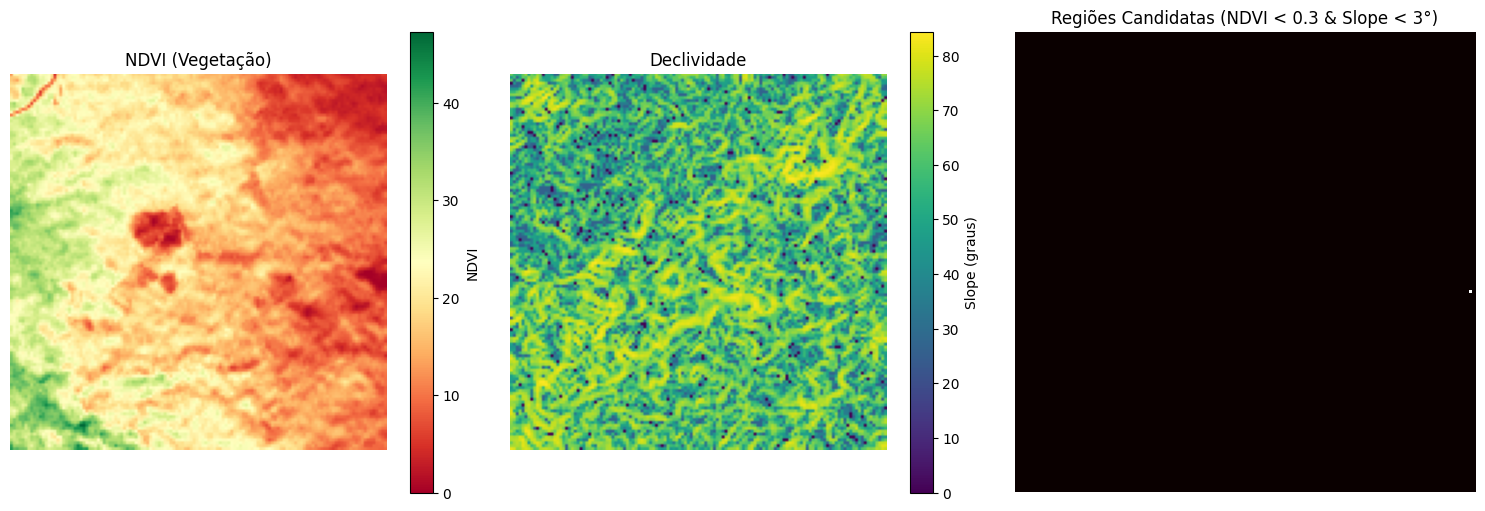

In [5]:
# 🧭 Comparação NDVI + Declividade (Slope) para localizar possíveis plataformas arqueológicas

import tifffile
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Corrigir caminho se estiver rodando dentro da pasta notebooks/
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

# Caminhos dos dados
sentinel_path = "data/raw/sentinel2/LATm10.350_LONm67.150.tiff"
dtm_path = "data/raw/lidar/DTM_LATm10.350_LONm67.150.tif"

# Carregamento
image = tifffile.imread(sentinel_path)
ndvi = image[:, :, 3]

with rasterio.open(dtm_path) as src:
    elevation = src.read(1)
    dtm_bounds = src.bounds
    dtm_transform = src.transform
    dtm_crs = src.crs

# Reamostrar NDVI para ter o mesmo shape do DTM (caso diferentes)
if ndvi.shape != elevation.shape:
    from skimage.transform import resize
    ndvi_resized = resize(ndvi, elevation.shape, preserve_range=True, anti_aliasing=True)
else:
    ndvi_resized = ndvi

# Calcula declividade (slope)
dy, dx = np.gradient(elevation)
slope = np.rad2deg(np.arctan(np.hypot(dx, dy)))

# Máscara de regiões candidatas
ndvi_thresh = 0.3
slope_thresh = 3.0
mask_candidate = (ndvi_resized < ndvi_thresh) & (slope < slope_thresh)

# Plot resultado
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(ndvi_resized, cmap="RdYlGn")
plt.colorbar(label="NDVI")
plt.title("NDVI (Vegetação)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(slope, cmap="viridis")
plt.colorbar(label="Slope (graus)")
plt.title("Declividade")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(mask_candidate, cmap="hot")
plt.title("Regiões Candidatas (NDVI < 0.3 & Slope < 3°)")
plt.axis("off")

plt.tight_layout()
plt.show()


In [6]:
print("NDVI range:", ndvi_resized.min(), "→", ndvi_resized.max())
print("Slope range:", slope.min(), "→", slope.max())
print("Candidatos encontrados:", mask_candidate.sum())


NDVI range: 0.0 → 47.27614234775184
Slope range: 0.0 → 84.35217611782296
Candidatos encontrados: 1


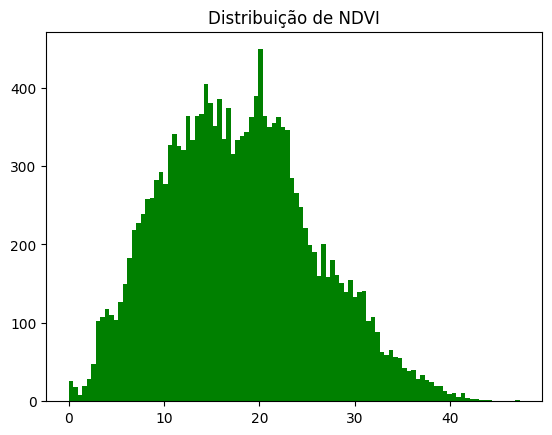

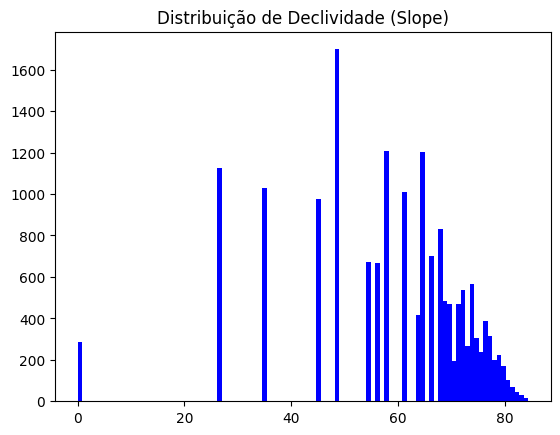

In [7]:
plt.hist(ndvi_resized.ravel(), bins=100, color='green')
plt.title("Distribuição de NDVI")
plt.show()

plt.hist(slope.ravel(), bins=100, color='blue')
plt.title("Distribuição de Declividade (Slope)")
plt.show()
